In [1]:
!pip install -q jieba

### load dataset

In [31]:
import pandas as pd

stocks = ["科大讯飞", "中科曙光", "工业富联", "昆仑万维", "浪潮信息"]

dfs = []

for stock in stocks:
    df = pd.read_csv(f"./data/{stock}20220701-20230630_cleaned_topic.csv")
    df["stock"] = stock
    dfs.append(df)
    
df = pd.concat(dfs, ignore_index=True)


In [1]:
import pandas as pd
df = pd.read_csv("./data/stocks20220701-20230630_cleaned_topic_cut.csv")
df["cut_words"] = [eval(str(words)) for words in df["cut_words"]]
df["cleaned_cut_words"] = [eval(str(words)) for words in df["cleaned_cut_words"]]

### jieba cut words

In [32]:
import jieba
jieba.enable_paddle()

Paddle enabled successfully......


In [37]:
for text in df["topic_text"].sample(10):
    seg_list = jieba.cut(text,use_paddle=True)
    print(text)
    print(list(seg_list))
    print("-----------------")

主力资金净流入与净流出个股排行榜一、主力净流入1拓维信息4.18亿2中电港3.30亿3融捷股份2.15亿4tcl中环1.94亿5n双元1.60亿6首都在线1.22亿7中国中铁1.06亿8中国平安1.06亿9美的集团1.06亿10中国石油9068.94万11世纪华通8592.29万12晶澳科技8476.14万13宁波建工7684.81万14优刻得-w7675.45万15建科院7479.57万16沧州明珠7459.73万17爱旭股份7419.02万18天奇股份7197.41万19勤上股份7035.65万20中国银行6991.41万21中国海油6774.21万22测绘股份6620.28万23山西焦煤5918.80万24新五丰5758.79万25初灵信息5735.86万26立讯精密5576.50万27中国铁建5503.36万28东方嘉盛5427.25万29隆平高科5330.90万30中国建筑5312.57万31江苏华辰5287.30万32天华新能5215.91万33巨星农牧5041.81万34工商银行4994.25万35蕾奥规划4990.29万36贵州茅台4975.65万37c西山4948.56万38金地集团4942.98万39九联科技4766.72万40奥拓电子4700.60万41天齐锂业4616.06万42东方雨虹4365.69万43中国交建4270.89万44农业银行4262.04万45南凌科技4245.94万46掌阅科技4159.11万47润欣科技4150.49万48意华股份4097.01万49同有科技4043.16万50兖矿能源4012.85万二、主力净流出1三安光电-8.75亿2华工科技-7.26亿3三六零-6.39亿4鸿博股份-6.00亿5昆仑万维-5.00亿6蓝色光标-4.02亿7北京文化-3.66亿8剑桥科技-3.23亿9焦点科技-2.30亿10创新医疗-2.25亿11中科曙光-2.15亿12通富微电-2.09亿13中远海科-1.86亿14上海电影-1.85亿15东方国信-1.82亿16汤姆猫-1.78亿17万兴科技-1.71亿18拓尔思-1.70亿19胜宏科技-1.67亿20天娱数科-1.60亿21华海清科-1.54亿22三峡能源-1.52亿23中际旭创-1.52亿24中国长城-1.51亿25中兴通讯-1.46亿26科大讯飞-1.45亿27新易盛-1.4

In [42]:
df["cut_words"] = df["topic_text"].astype(str).apply(lambda x: list(jieba.cut(x, use_paddle=True)))

In [43]:
df.to_csv("./data/stocks20220701-20230630_cleaned_topic_cut.csv", index=False)

### further processing

In [43]:
import string
import re
def remove_punctuation(words):
    chinese_punc = "！？｡。＂＃＄％＆＇（）＊＋，－／：；＜＝＞＠［＼］＾＿｀｛｜｝～｟｠｢｣､、〃》「」『』【】〔〕〖〗〘〙〚〛〜〝〞〟〰〾〿–—‘’‛“”„‟…‧﹏.¥"
    english_punc = string.punctuation
    punc = chinese_punc + english_punc
    
    #remove punctuation from each word
    words = [re.sub(rf'[{punc}]', '', word) for word in words]
    return words

def remove_numbers(words):
    #remove numbers from each word
    words = [re.sub(r'\d+', '', word) for word in words]
    return words

def removeX(words):
    words = [re.sub(r'X', '', word) for word in words]
    return words

In [91]:
df["cut_words"] = [eval(str(words)) for words in df["cut_words"]]

In [92]:
df["cleaned_cut_words"] = df["cut_words"].apply(remove_punctuation)
df["cleaned_cut_words"] = df["cleaned_cut_words"].apply(remove_numbers)
df["cleaned_cut_words"] = df["cleaned_cut_words"].apply(removeX)

In [93]:
stopwords = set()
stopwords = stopwords.union([k.strip() for k in open('./stopwords/baidu_stopwords.txt', encoding='utf8').readlines() if k.strip() != ''])
stopwords = stopwords.union([k.strip() for k in open('./stopwords/hit_stopwords.txt', encoding='utf8').readlines() if k.strip() != ''])
stopwords = stopwords.union([k.strip() for k in open('./stopwords/scu_stopwords.txt', encoding='utf8').readlines() if k.strip() != ''])

def remove_stopwords(words):
    words = [word for word in words if word not in stopwords]
    return words

In [94]:
df["cleaned_cut_words"] = df["cleaned_cut_words"].apply(remove_stopwords)

In [95]:
def remove_empty(words):
    words = [re.sub(r'\s+', '', word) for word in words]
    words = [word for word in words if len(word) > 1]
    return words

df["cleaned_cut_words"] = df["cleaned_cut_words"].apply(remove_empty)

In [96]:
from functools import partial

def remove_domain_words(words,domain_words):
    words = [word for word in words if word not in domain_words]
    words = [word for word in words if len(word) > 1]
    return words

domain_words = ["sh","sz","亿n","月日"]
partial_remove_domain_words = partial(remove_domain_words, domain_words=domain_words)
df["cleaned_cut_words"] = df["cleaned_cut_words"].apply(partial_remove_domain_words)

In [97]:
df.to_csv("./data/stocks20220701-20230630_cleaned_topic_cut.csv", index=False)

### LDA

In [1]:
!pip install gensim

In [426]:
import pandas as pd
df = pd.read_csv("./data/stocks20220701-20230630_cleaned_topic_cut.csv")

/Users/adam/anaconda3/envs/TwitterFinTopic/lib/python3.7/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [99]:
docs = []
for doc in df["cleaned_cut_words"]:
    docs.append(eval(str(doc)))

In [2]:
import gensim
from gensim import corpora, models
from gensim.models.coherencemodel import CoherenceModel
from gensim.models.ldamodel import LdaModel
from gensim.test.utils import datapath

In [4]:
docs = df["cleaned_cut_words"]
dictionary = corpora.Dictionary(docs)
corpus = [dictionary.doc2bow(doc) for doc in docs]

In [110]:
def coherence(num_topics):
    print(f"Number of topics: {num_topics}")
    ldamodel = LdaModel(corpus, num_topics = num_topics, id2word = dictionary,random_state=42,passes=5)
    ldamodel.save(datapath(f"/Users/adam/Desktop/Spring 2024/Text As Data/Final Project/TwitterFinTextAsData/models/lda_{num_topics}_topics"))
    perplexity = ldamodel.log_perplexity(corpus)
    print(perplexity)
    # ldacm = CoherenceModel(model = ldamodel, texts = docs, dictionary = dictionary, coherence="c_v")
    # print(ldacm.get_coherence())
    print("-----------------")
    return perplexity

In [111]:
def coherence_count(num_topics):
    nums = range(1,num_topics+1)
    scores = []
    for num in nums:
        score = coherence(num)
        scores.append(score)
    return scores
    
scores = coherence_count(20)

Number of topics: 1
-8.78091324720302
-----------------
Number of topics: 2
-8.594637107692508
-----------------
Number of topics: 3
-8.516399874441197
-----------------
Number of topics: 4
-8.395542479304721
-----------------
Number of topics: 5
-8.433844316088566
-----------------
Number of topics: 6
-8.54205152362244
-----------------
Number of topics: 7
-8.570943750244137
-----------------
Number of topics: 8
-8.741916677252943
-----------------
Number of topics: 9
-8.963795585367333
-----------------
Number of topics: 10
-9.250831765270599
-----------------
Number of topics: 11
-9.626293372669538
-----------------
Number of topics: 12
-10.106183374992318
-----------------
Number of topics: 13
-10.669779765348212
-----------------
Number of topics: 14
-11.244393504276559
-----------------
Number of topics: 15
-11.814745957832526
-----------------
Number of topics: 16
-12.364199251112797
-----------------
Number of topics: 17
-12.867383613959069
-----------------
Number of topics: 1

In [112]:
coherence_scores = []
for i in range(1,21):
    print(f"Number of topics: {i}")
    #load the model
    lda_model = LdaModel.load(datapath(f"/Users/adam/Desktop/Spring 2024/Text As Data/Final Project/TwitterFinTextAsData/models/lda_{i}_topics"))
    coherence_model_lda = CoherenceModel(model=lda_model, texts=docs, dictionary=dictionary, coherence='u_mass')
    coherence_lda = coherence_model_lda.get_coherence()
    coherence_scores.append(coherence_lda)
    print('Coherence Score: ', coherence_lda)

Number of topics: 1
Coherence Score:  -1.45766641950046
Number of topics: 2
Coherence Score:  -1.4704468425805985
Number of topics: 3
Coherence Score:  -1.4365354472201226
Number of topics: 4
Coherence Score:  -1.482106421908521
Number of topics: 5
Coherence Score:  -2.8971904511639153
Number of topics: 6
Coherence Score:  -4.209755834550592
Number of topics: 7
Coherence Score:  -3.035893782597785
Number of topics: 8
Coherence Score:  -5.181197091310567
Number of topics: 9
Coherence Score:  -4.234945854054098
Number of topics: 10
Coherence Score:  -4.559695804342858
Number of topics: 11
Coherence Score:  -4.450476587256684
Number of topics: 12
Coherence Score:  -4.1641617416847385
Number of topics: 13
Coherence Score:  -4.6567904252554335
Number of topics: 14
Coherence Score:  -3.6166737702133473
Number of topics: 15
Coherence Score:  -4.433437096969654
Number of topics: 16
Coherence Score:  -3.9433044306851954
Number of topics: 17
Coherence Score:  -4.196616031692812
Number of topics:

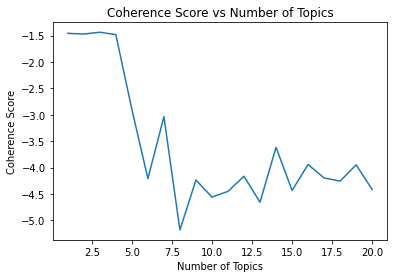

In [113]:
#plot the coherence scores
import matplotlib.pyplot as plt
plt.plot(range(1,21), coherence_scores)
plt.xlabel("Number of Topics")
plt.ylabel("Coherence Score")
plt.title("Coherence Score vs Number of Topics")
plt.show()

In [6]:
lda_model = LdaModel.load(datapath(f"/Users/adam/Desktop/Spring 2024/Text As Data/Final Project/TwitterFinTextAsData/models/lda_7_topics"))
lda_model.print_topics()

[(0,
  '0.031*"ai" + 0.028*"模型" + 0.025*"chatgpt" + 0.009*"人工智能" + 0.008*"内容" + 0.008*"训练" + 0.007*"aigc" + 0.007*"公司" + 0.006*"技术" + 0.006*"发布"'),
 (1,
  '0.038*"主力" + 0.021*"流出" + 0.018*"资金" + 0.018*"流入" + 0.017*"中国" + 0.017*"科技" + 0.011*"股份" + 0.009*"信息" + 0.008*"今日" + 0.007*"股票"'),
 (2,
  '0.007*"话题" + 0.007*"两周" + 0.005*"认知" + 0.004*"福利" + 0.003*"在一起" + 0.003*"周年" + 0.003*"吃饭" + 0.003*"大讯" + 0.002*"拿出来" + 0.002*"讯飞"'),
 (3,
  '0.025*"交易" + 0.023*"模拟" + 0.016*"发展" + 0.015*"价格" + 0.012*"发布" + 0.011*"经济" + 0.010*"委托" + 0.010*"政策" + 0.009*"产业" + 0.009*"建设"'),
 (4,
  '0.015*"算力" + 0.014*"公司" + 0.012*"芯片" + 0.011*"服务器" + 0.011*"技术" + 0.011*"数据" + 0.011*"产品" + 0.010*"行业" + 0.009*"相关" + 0.009*"市场"'),
 (5,
  '0.086*"亿元" + 0.053*"买入" + 0.029*"卖出" + 0.028*"机构" + 0.017*"资金" + 0.015*"同比" + 0.014*"公司" + 0.014*"股份" + 0.012*"减持" + 0.011*"万元"'),
 (6,
  '0.024*"板块" + 0.012*"涨停" + 0.011*"资金" + 0.011*"个股" + 0.011*"市场" + 0.011*"人工智能" + 0.010*"今日" + 0.007*"指数" + 0.007*"方向" + 0.006*"关注"')]

In [32]:
dictionary = lda_model.id2word
corpus = [dictionary.doc2bow(doc) for doc in docs]

In [133]:
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
pyLDAvis.enable_notebook()

# feed the LDA model into the pyLDAvis instance
lda_viz = gensimvis.prepare(lda_model, corpus, dictionary)
pyLDAvis.enable_notebook()
pyLDAvis.display(lda_viz)

/Users/adam/anaconda3/envs/TwitterFinTopic/lib/python3.7/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/Users/adam/anaconda3/envs/TwitterFinTopic/lib/python3.7/site-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)


1. stock fluctuation
'0.024*"板块" + 0.012*"涨停" + 0.011*"资金" + 0.011*"个股" + 0.011*"市场" + 0.011*"人工智能" + 0.010*"今日" + 0.007*"指数" + 0.007*"方向" + 0.006*"关注"'
2. computing power
'0.015*"算力" + 0.014*"公司" + 0.012*"芯片" + 0.011*"服务器" + 0.011*"技术" + 0.011*"数据" + 0.011*"产品" + 0.010*"行业" + 0.009*"相关" + 0.009*"市场"'
3. financial market news
'0.038*"主力" + 0.021*"流出" + 0.018*"资金" + 0.018*"流入" + 0.017*"中国" + 0.017*"科技" + 0.011*"股份" + 0.009*"信息" + 0.008*"今日" + 0.007*"股票"'
4. AI and ChatGPT
'0.031*"ai" + 0.028*"模型" + 0.025*"chatgpt" + 0.009*"人工智能" + 0.008*"内容" + 0.008*"训练" + 0.007*"aigc" + 0.007*"公司" + 0.006*"技术" + 0.006*"发布"'
5. financial disclosure
'0.086*"亿元" + 0.053*"买入" + 0.029*"卖出" + 0.028*"机构" + 0.017*"资金" + 0.015*"同比" + 0.014*"公司" + 0.014*"股份" + 0.012*"减持" + 0.011*"万元"'
6. AI policy
'0.025*"交易" + 0.023*"模拟" + 0.016*"发展" + 0.015*"价格" + 0.012*"发布" + 0.011*"经济" + 0.010*"委托" + 0.010*"政策" + 0.009*"产业" + 0.009*"建设"'
7. social interactions from firms
'0.007*"话题" + 0.007*"两周" + 0.005*"认知" + 0.004*"福利" + 0.003*"在一起" + 0.003*"周年" + 0.003*"吃饭" + 0.003*"大讯" + 0.002*"拿出来" + 0.002*"讯飞"'

There are 7 topics in total. Topic 1 is around fluctuation of stock markets. 
Topic 2 and 4 talk about concepts on AI, such as computing power and AIGC.  
Topic 3 and Topic 5 are financial news or disclosures of top AI stocks. 
Topic 6 discusses AI policies of Chinese government. Topic 7 is the interactions of AI companies with Weibo users, mainly aimed for promoting its brand.
Since topic 7 is not directly relevant to stock markets, we exclude it from disucssion among all other topics.

In [11]:
num_topics = 7
topic_name = {
    1: "stock fluctuation",
    2: "computing power",
    3: "financial market news",
    4: "AI and ChatGPT",
    5: "financial disclosure",
    6: "AI policy",
    7: "AI firms' social interactions"
}

### prevalence

In [145]:
import numpy as np

topic_prob = np.zeros((len(corpus),num_topics)) 
for i in range(len(corpus)):
    for j,prob in lda_model.get_document_topics(corpus[i]):
        topic_prob[i,j] = prob
           

In [146]:
for i in range(1,num_topics+1):
    df[f"lda_topic_{i}"] = topic_prob[:,i-1]
df["lda_topic"] = np.argmax(topic_prob,axis=1) + 1

In [143]:
df['create_time'] = pd.to_datetime(df['create_time'])
df["date"] = df["create_time"].dt.to_period("D")
df["week"] = df["create_time"].dt.to_period("W")
df["month"] = df["create_time"].dt.to_period("M")

<Figure size 3600x1800 with 0 Axes>

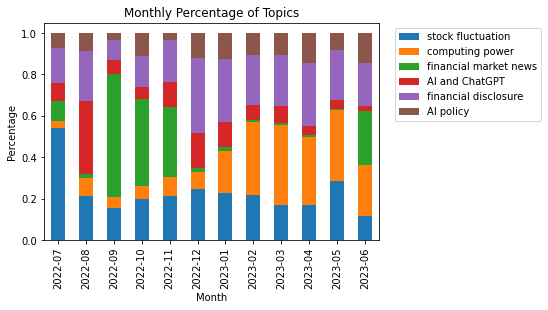

In [158]:
lda_topic_monthly_percentage = df[(df["date"] >= "2022-07-01") & (df["date"] <= "2023-06-30") & (df["lda_topic"] != 7)][["month","lda_topic"]]\
    .groupby(["month","lda_topic"]).size().unstack().apply(lambda x: x/x.sum(), axis=1)
lda_topic_monthly_percentage.columns = list(topic_name.values())[0:6]

import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6),dpi=300)
# Plot the stacked bar chart
ax = lda_topic_monthly_percentage.plot(kind="bar", stacked=True)

#create title and labels
plt.title("Monthly Percentage of Topics")
plt.xlabel("Month")
plt.ylabel("Percentage")

# Adjust the legend position
ax.legend(loc="upper right", bbox_to_anchor=(1.5, 1))

plt.savefig("topic_monthly_percentage.png", bbox_inches="tight")

# Show the plot
plt.show()


AI and ChatGPT is not as influential as we thought
After ChatGPT computing power increases 

In [162]:
keyword_dict = {
    '002230': '科大讯飞',
    '601138': '工业富联',
    '603019': '中科曙光',
    '000977': '浪潮信息',
    '300418': '昆仑万维',
}

In [163]:
stock_translation = {
    "科大讯飞": "iFlytek",
    "工业富联": "Foxconn",
    "中科曙光": "Sugon",
    "浪潮信息": "Inspur",
    "昆仑万维": "Kunlun Tech"
}

In [170]:
import matplotlib.font_manager as font_manager
matplotlib.rc("font", family='SimHei')

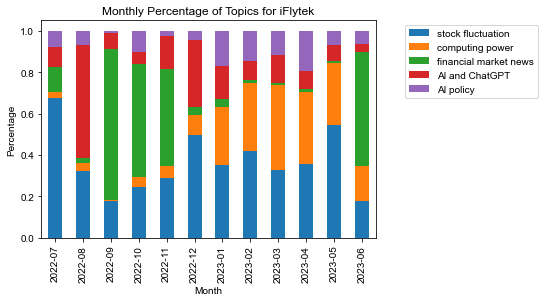

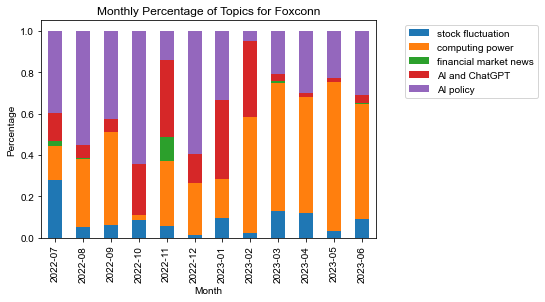

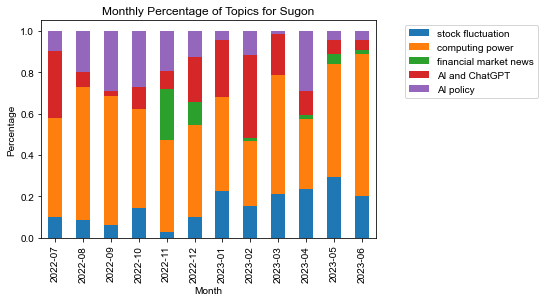

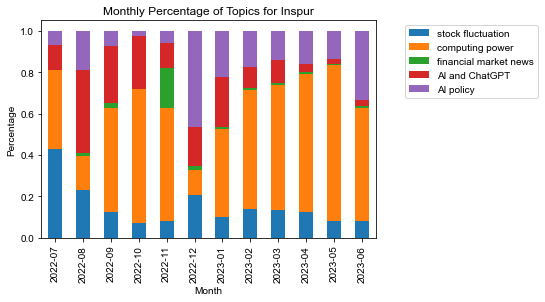

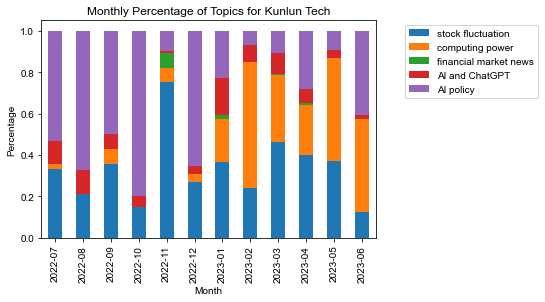

In [173]:
import matplotlib.pyplot as plt
import matplotlib

matplotlib.rc("font", family='Arial')

# For each stock, draw its topic probabilities per month
for stock in keyword_dict.values():
    lda_topic_monthly_percentage = df[(df["date"] >= "2022-07-01") & (df["date"] <= "2023-06-30") \
        & (df["lda_topic"] != 7) & (df["lda_topic"] != 5) & (df["stock"] == stock)][["month","lda_topic"]]\
        .groupby(["month","lda_topic"]).size().unstack().apply(lambda x: x/x.sum(), axis=1)
    lda_topic_monthly_percentage.columns = list(topic_name.values())[0:4] + [list(topic_name.values())[5]]
    lda_topic_monthly_percentage.plot(kind="bar", stacked=True)
    plt.title(f"Monthly Percentage of Topics for {stock_translation[stock]}")
    plt.xlabel("Month")
    plt.ylabel("Percentage")
    plt
    plt.legend(loc="upper right", bbox_to_anchor=(1.5, 1))
    plt.show()


In [121]:
# Get the topic-term matrix from the LDA model
word_ids = set()
for i in range(num_topics):
    word_ids = word_ids.union([word_id for word_id, prob in lda_model.get_topic_terms(i, topn=25)])
word_ids = list(word_ids)
topic_term_matrix = lda_model.get_topics()[:, word_ids]

In [122]:
topic_term_df = pd.DataFrame(topic_term_matrix, columns=[dictionary[word_id] for word_id in word_ids])

In [180]:
similar_words = pd.DataFrame()
candidate_words = []

In [197]:
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

similarity_scores = cosine_similarity(topic_term_df.T, topic_term_df["chatgpt"].values.reshape(1,7)).flatten()
similar_words["chatgpt"] = topic_term_df.columns[np.argsort(similarity_scores)[::-1]][1:]
candidate_words.extend(topic_term_df.columns[np.argsort(similarity_scores)[::-1]][0:11])

In [198]:
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

similarity_scores = cosine_similarity(topic_term_df.T, topic_term_df["ai"].values.reshape(1,7)).flatten()
similar_words["ai"] = topic_term_df.columns[np.argsort(similarity_scores)[::-1]][1:]
candidate_words.extend(topic_term_df.columns[np.argsort(similarity_scores)[::-1]][0:11])

In [199]:
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

similarity_scores = cosine_similarity(topic_term_df.T, topic_term_df["人工智能"].values.reshape(1,7)).flatten()
similar_words["人工智能"] = topic_term_df.columns[np.argsort(similarity_scores)[::-1]][1:]
candidate_words.extend(topic_term_df.columns[np.argsort(similarity_scores)[::-1]][0:11])

In [200]:
candidate_words = list(set(candidate_words))

In [202]:
candidate_words_translation = ["adjust", "direction", "Baidu", "GPT", "model", "leader", "risk", "focus", "train", "artificial intelligence", "trend",\
    "AIGC", "future", "concept", "opportunity", "market", "content", "OpenAI", "Microsoft", "launch", "AI", "ChatGPT", "video"]

In [214]:
from umap.umap_ import UMAP

# Reduce the dimension of topic_term_df to 2 dimensions
reducer = UMAP(n_components=2)
embedding = reducer.fit_transform(topic_term_df[candidate_words].T)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


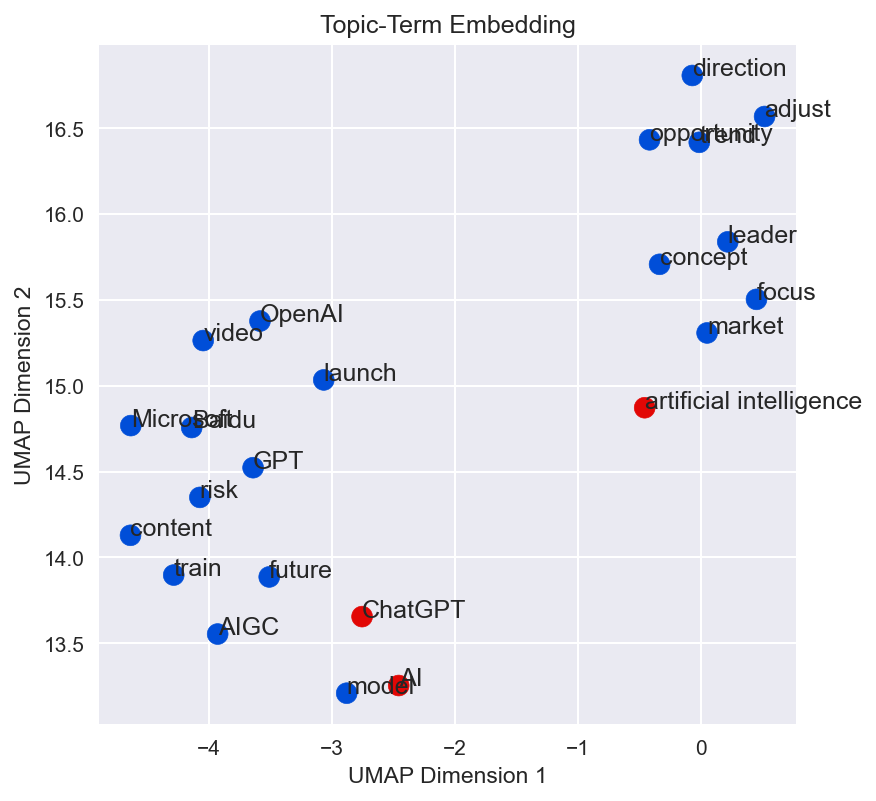

In [233]:
import numpy as np
import matplotlib.pyplot as plt
# Define the color palette
colors = np.where(np.isin(candidate_words_translation, ["AI", "artificial intelligence", "ChatGPT"]), "#e20705", "#004ed8")

plt.figure(figsize=(6, 6), dpi=150)
plt.style.use('seaborn')

# Scatter plot with the updated color palette
plt.scatter(embedding[:, 0], embedding[:, 1], c=colors, s=100)

for i, word in enumerate(candidate_words_translation):
    plt.annotate(word, (embedding[i, 0], embedding[i, 1]), fontsize=12)

plt.xlabel('UMAP Dimension 1')
plt.ylabel('UMAP Dimension 2')
plt.title('Topic-Term Embedding')
plt.legend()

plt.savefig("term_embedding.png", bbox_inches="tight")
plt.show()

In [315]:
sugon = pd.read_csv("./data/zhongke_bert_sentiment.csv")
foxconn = pd.read_csv("./data/gongye_bert_sentiment.csv")
inspur = pd.read_csv("./data/langchao_bert_sentiment.csv")
kunlun = pd.read_csv("./data/kunlun_bert_sentiment.csv")
keda = pd.read_csv("./data/keda_bert_sentiment.csv")

In [316]:
sentiment_df = pd.concat([sugon, foxconn, inspur, kunlun, keda]).drop_duplicates(subset=["id"])
distinct_df = df.drop_duplicates(subset=["id"])[(df["create_time"] >= "2022-07-01") & (df["create_time"] <= "2023-06-30")]

/Users/adam/anaconda3/envs/TwitterFinTopic/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


In [319]:
sentiment_df["sentiment_class"] = sentiment_df["weighted_mean_score"].apply(lambda x: 1 if x > 0 else -1)

In [320]:
distinct_df = distinct_df.merge(sentiment_df[["id","sentiment_class","weighted_mean_score"]], on="id", how="left")

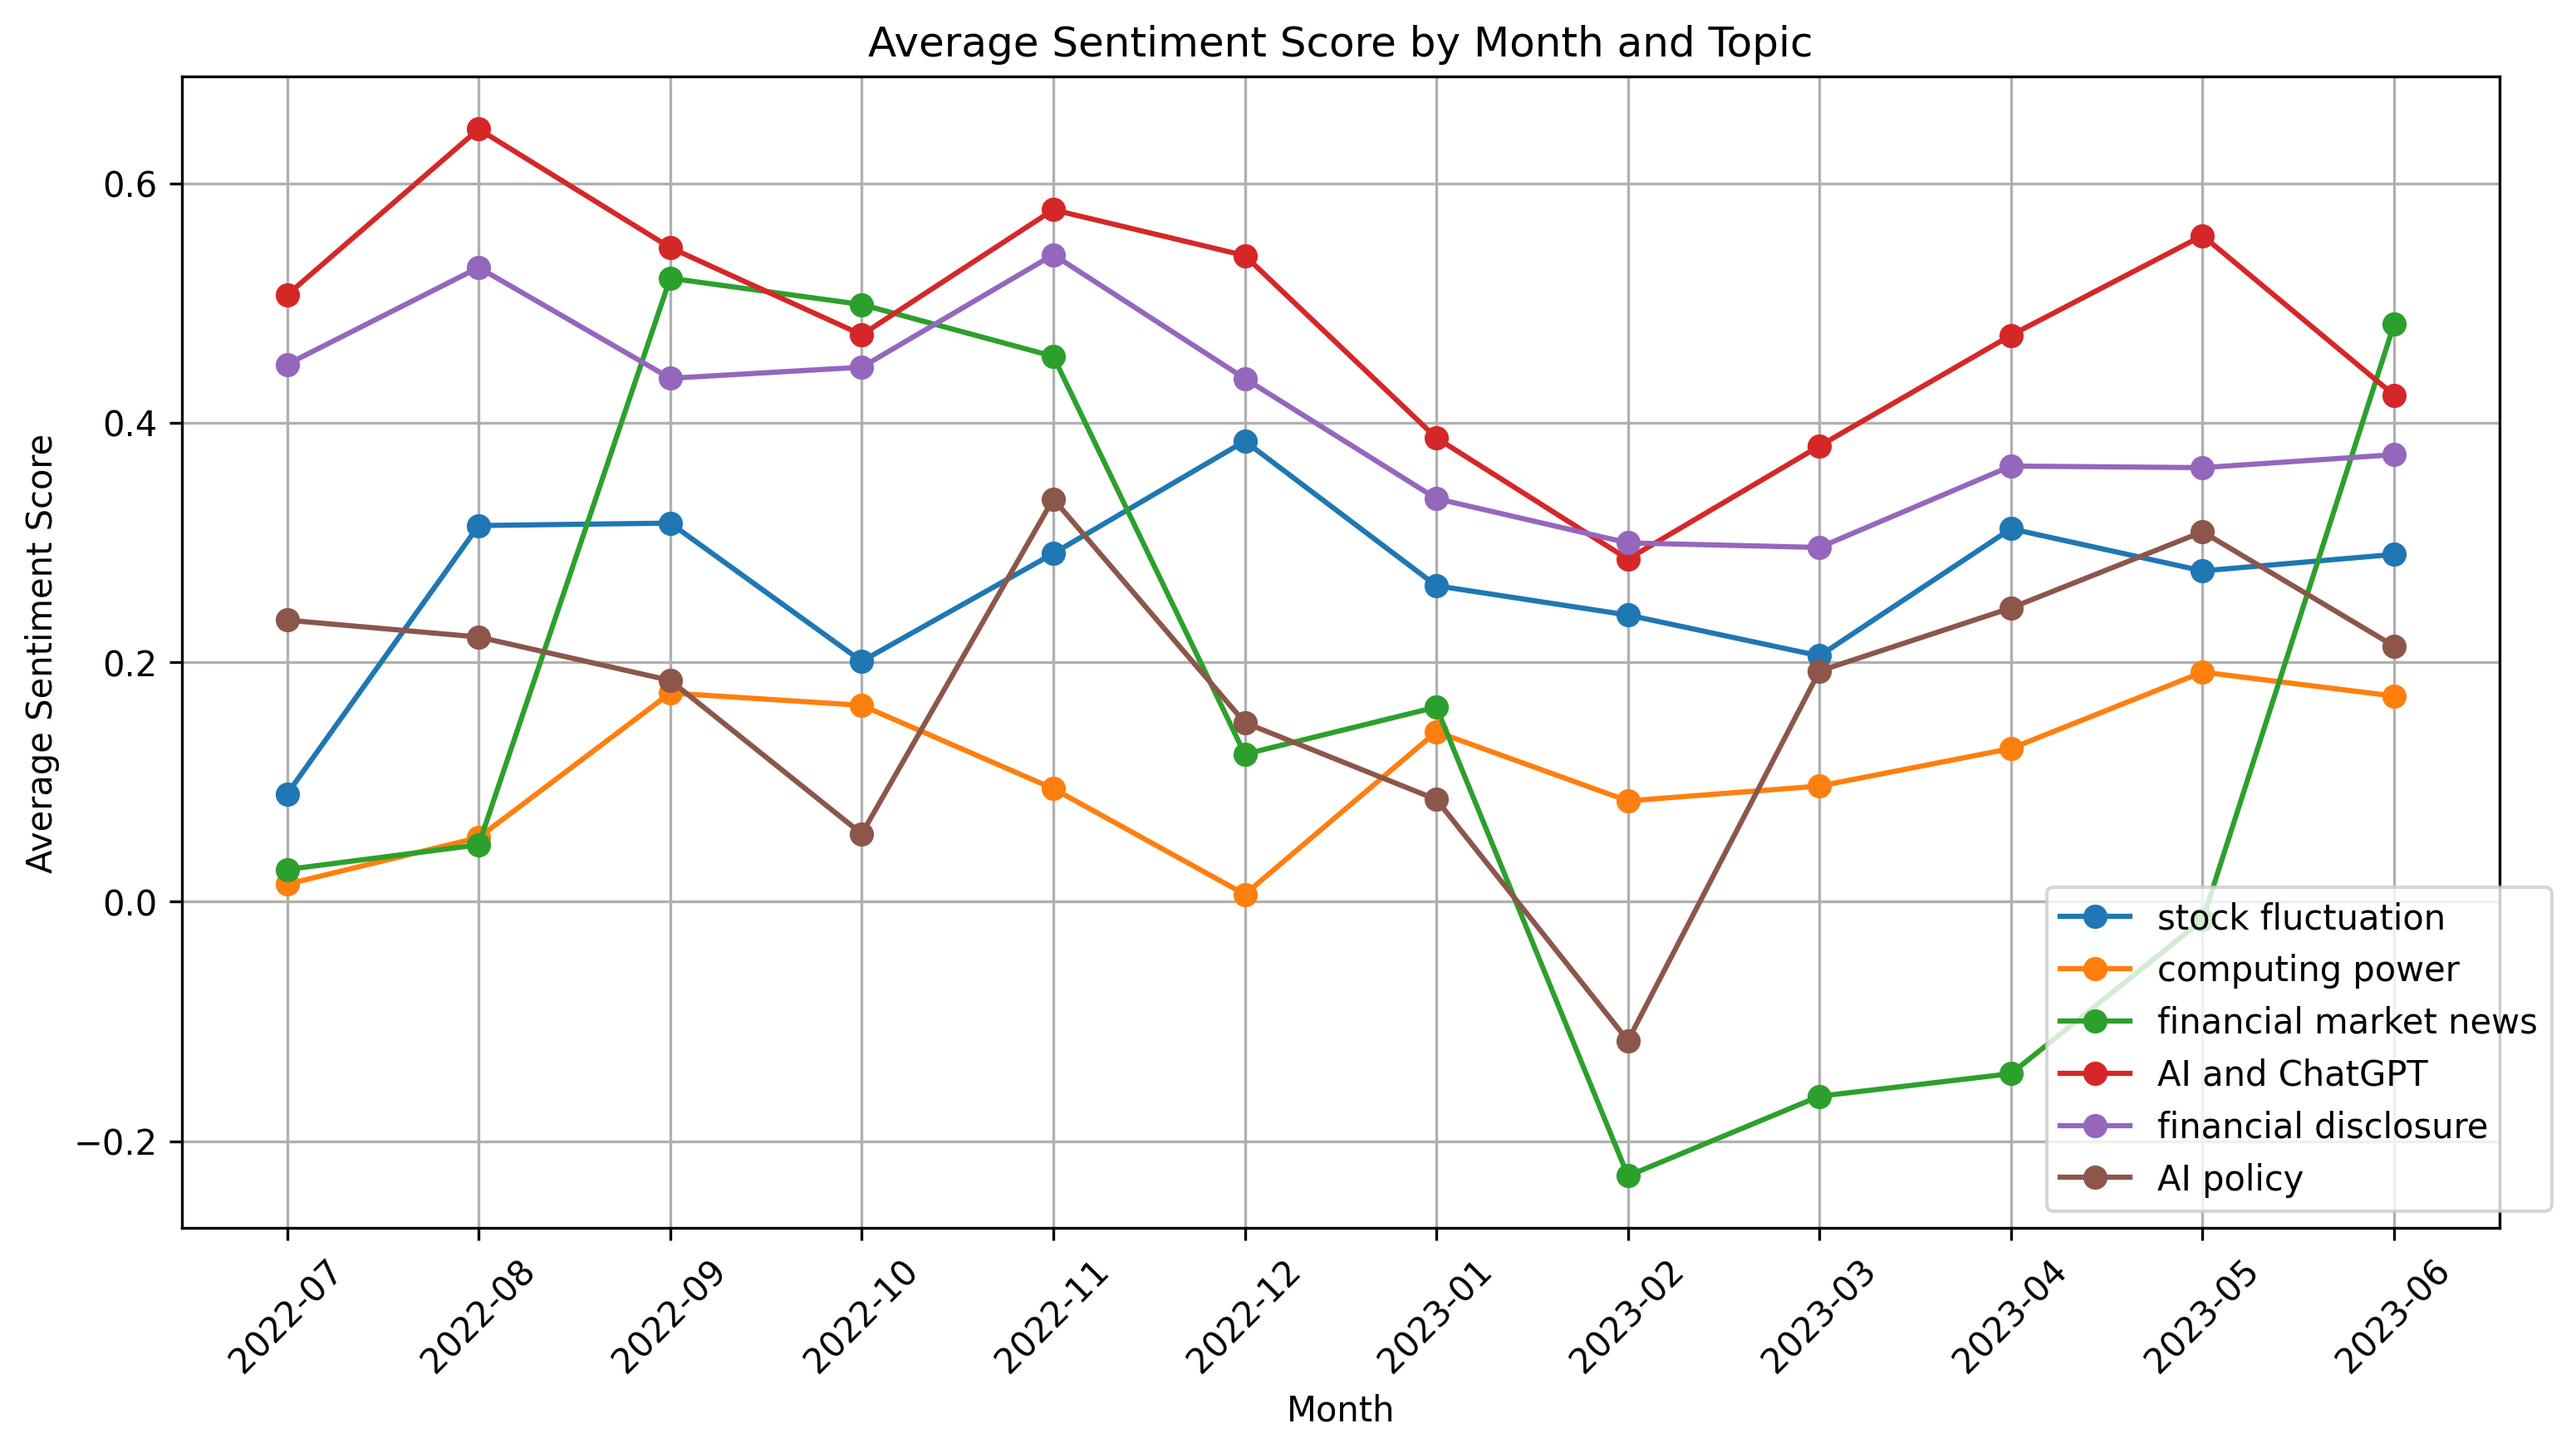

In [336]:
import matplotlib.pyplot as plt

# Convert 'month' column to string
distinct_df["month"] = distinct_df["month"].astype(str)

avg_sentiment = distinct_df[(~distinct_df["weighted_mean_score"].isna()) & (distinct_df["lda_topic"] != 7)][["month", "lda_topic", "weighted_mean_score"]].groupby(["month", "lda_topic"]).mean().reset_index()

plt.style.use('default')
plt.figure(figsize=(12, 6), dpi=300)

for topic in avg_sentiment["lda_topic"].unique():
    topic_data = avg_sentiment[avg_sentiment["lda_topic"] == topic]
    plt.plot(topic_data["month"], topic_data["weighted_mean_score"], label=topic_name[topic], marker="o")

plt.xlabel("Month")
plt.ylabel("Average Sentiment Score")
plt.title("Average Sentiment Score by Month and Topic")
plt.legend(loc="lower right", bbox_to_anchor=(1.03, 0))
plt.xticks(rotation=45)
plt.grid(True)

plt.savefig("average_sentiment_score_month_topic.png")

plt.show()


In [339]:
df["user_id"].value_counts()

5888901427    1337
3738618623     946
5677083073     896
3776707692     836
6670712539     833
              ... 
6141100029       1
2410866792       1
2109735162       1
6211699796       1
5897733876       1
Name: user_id, Length: 20111, dtype: int64

### stock price

In [347]:
import os
keyword_dict = {
    '002230': '科大讯飞',
    '601138': '工业富联',
    '603019': '中科曙光',
    '000977': '浪潮信息',
    '300418': '昆仑万维',
}

root,_,files = list(os.walk('./data/stock_price'))[0]
stock_price = []
for file in files:
    temp = pd.read_csv(os.path.join(root,file))
    temp["stock"] = keyword_dict[file.split(".")[0]]
    stock_price.append(temp)
stock_price = pd.concat(stock_price)

/Users/adam/anaconda3/envs/TwitterFinTopic/lib/python3.7/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [152]:
import pandas as pd
topic_term_matrix = lda_model.get_topics()
topic_term_df = pd.DataFrame(topic_term_matrix, columns=[dictionary[i] for i in range(topic_term_matrix.shape[1])])

/Users/adam/anaconda3/envs/TwitterFinTopic/lib/python3.7/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [175]:
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
# Compute cosine similarity between "chatgpt" topic and each column of topic_term_df
similarity_score = cosine_similarity(topic_term_df.values.reshape(-1,7), topic_term_df["chatgpt"].values.reshape(1,7))

/Users/adam/anaconda3/envs/TwitterFinTopic/lib/python3.7/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [198]:
topic_term_df.columns[np.argsort(similarity_score.reshape(-1))[::-1][:10]]

/Users/adam/anaconda3/envs/TwitterFinTopic/lib/python3.7/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Index(['杭州市民政局', '电子计算机股', '华工科技公告股东润君达', '首批', '生浪', '全景图', '走阳',
       '北方华创华海清科德生科技利好刺激逆势大涨金海通中国科传', 'aigc算力ai', '美遏华'],
      dtype='object')

In [196]:
from umap.umap_ import UMAP

# Reduce the dimension of topic_term_df to 2 dimensions
reducer = UMAP(n_components=2)
embedding = reducer.fit_transform(topic_term_df.values.T)

# Plot the reduced data
plt.scatter(embedding[:, 0], embedding[:, 1])
plt.xlabel('UMAP Dimension 1')
plt.ylabel('UMAP Dimension 2')
plt.title('Topic-Term Embedding')
plt.show()

/Users/adam/anaconda3/envs/TwitterFinTopic/lib/python3.7/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


KeyboardInterrupt: 